Text(0.5, 0, 'frequency (Hz)')

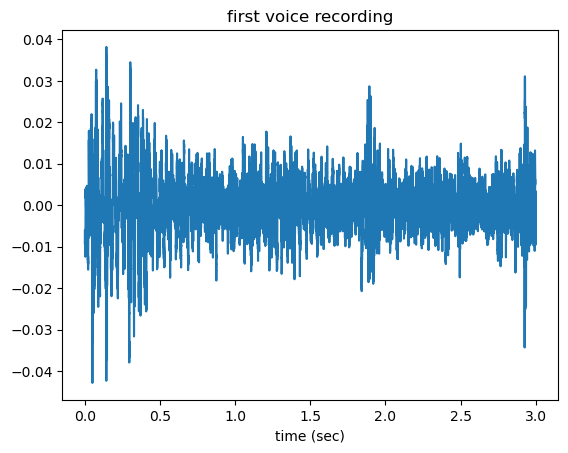

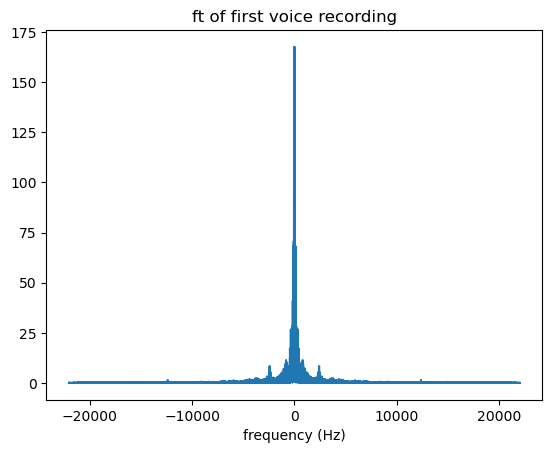

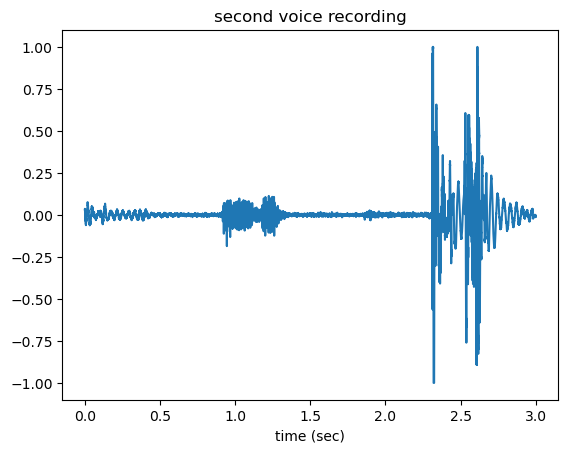

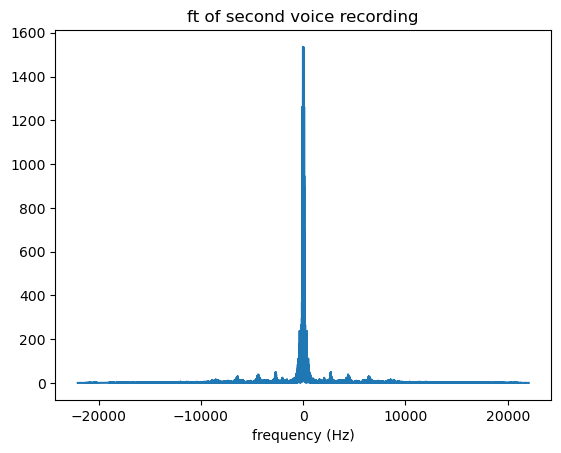

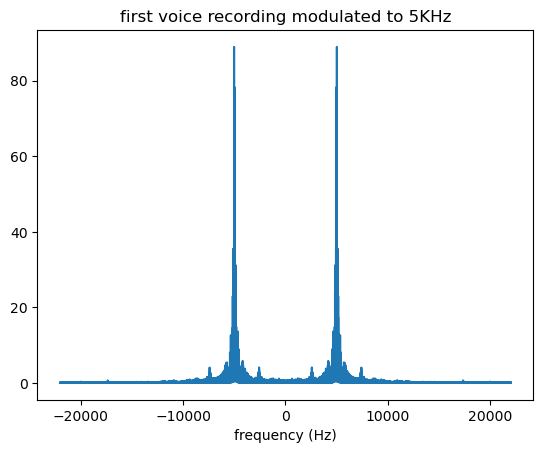

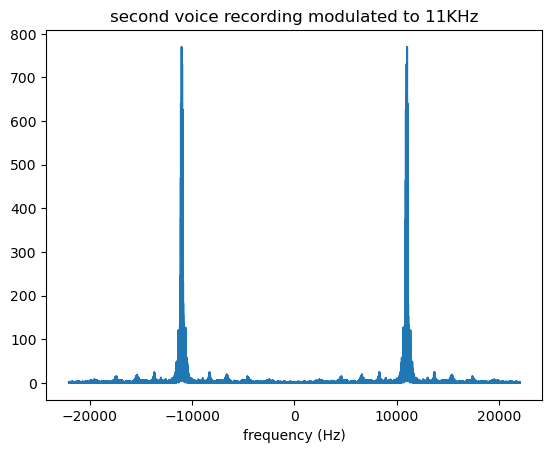

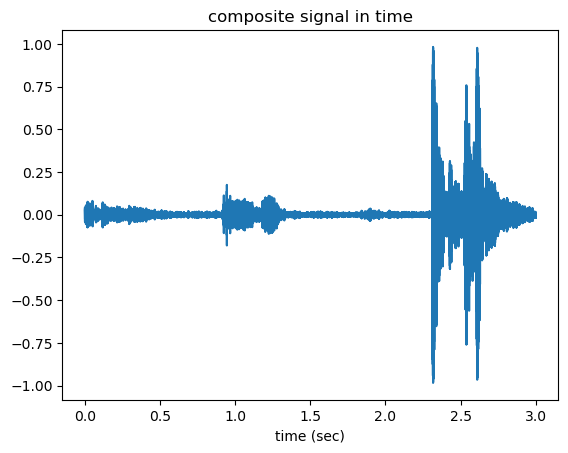

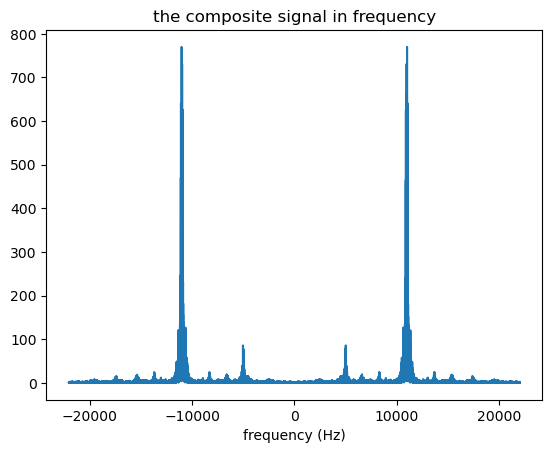

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftfreq, fftshift, ifft
import sounddevice as sd
# recording the sound
fs = 44100 # Sample rate
seconds = 3 # Duration of recording
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait() # Wait until recording is finished
# display the sound signal
myrecording_in_time_1 = np.squeeze(myrecording)
time = np.linspace(0,seconds,myrecording_in_time_1.shape[0])
plt.figure(1)
plt.plot(time , myrecording_in_time_1)
plt.title("first voice recording")
plt.xlabel("time (sec)")
# ft the sound signal and display its magnitude
frequencies = np.linspace(-fs/2,fs/2,fs*seconds)
myrecording_in_frequency_1 = fftshift(fft(myrecording_in_time_1))
plt.figure(2)
plt.plot(frequencies , np.abs(myrecording_in_frequency_1))
plt.title("ft of first voice recording")
plt.xlabel("frequency (Hz)")

xx = input('After pressing return, enter your voice: ')
myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait() # Wait until recording is finished
# display the sound signal
myrecording_in_time_2 = np.squeeze(myrecording)
plt.figure(3)
plt.plot(time  ,myrecording_in_time_2)
plt.title("second voice recording")
plt.xlabel("time (sec)")
# ft the sound signal and display its magnitude
myrecording_in_frequency_2 = fftshift(fft(myrecording_in_time_2))
plt.figure(4)
plt.plot(frequencies , np.abs(myrecording_in_frequency_2))
plt.title("ft of second voice recording")
plt.xlabel("frequency (Hz)")
#modulate the signal
myrecording_in_time_modulated_1 = np.multiply(myrecording_in_time_1, np.cos(2*np.pi*5000*time))
plt.figure(5)
plt.plot(frequencies , np.abs(fftshift(fft(myrecording_in_time_modulated_1))))
plt.title("first voice recording modulated to 5KHz")
plt.xlabel("frequency (Hz)")

myrecording_in_time_modulated_2 = np.multiply(myrecording_in_time_2, np.cos(2*np.pi*11000*time))
plt.figure(6)
plt.plot(frequencies , np.abs(fftshift(fft(myrecording_in_time_modulated_2))))
plt.title("second voice recording modulated to 11KHz")
plt.xlabel("frequency (Hz)")

myrecording_in_time_modulated = np.add(myrecording_in_time_modulated_1,myrecording_in_time_modulated_2)
plt.figure(7)
plt.plot(time,myrecording_in_time_modulated)
plt.title("composite signal in time")
plt.xlabel("time (sec)")

myrecording_in_frequency_modulated = fftshift(fft(myrecording_in_time_modulated))
plt.figure(8)
plt.plot(frequencies , np.abs(myrecording_in_frequency_modulated))
plt.title("the composite signal in frequency")
plt.xlabel("frequency (Hz)")